# Librerias


In [181]:
import pandas as pd
import unicodedata
import re
import jellyfish as jf

In [331]:
#import sys
#sys.path.append('./env/lib/python3.8/site-packages')

## Dataset

In [183]:
delitos = pd.read_csv("practica_1.csv")

/tmp/ipykernel_39686/2895496411.py:1: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  delitos = pd.read_csv("practica_1.csv")


In [184]:
delitos.head(10)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,...,longitud,latitud,geopoint,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,0,2016,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,...,-99.103527,19.481076,"19.4810759998,-99.103527",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,INVESTIGACIÃN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÃN SECCIÃN TLACOTAL,...,-99.106072,19.395398,"19.3953976727,-99.1060723829",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2015,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,...,-99.055887,19.322458,"19.3224579998,-99.055887",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2018,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÃN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,...,-99.042786,19.319141,"19.3191405147,-99.0427862526",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2018,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,...,-99.111563,19.386594,"19.3865939284,-99.1115626682",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2018,Mayo,2018-05-22 06:20:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-1,UI-1SD,TLACOQUEMECATL,...,-99.1771,19.379581,"19.3795809108,-99.1771001785",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2016,Enero,2016-01-02 21:20:00,ROBO DE DINERO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTACALCO,IZC-1,UI-1CD,LOS REYES,...,-99.117183,19.398040,"19.3980399998,-99.117183",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2017,Noviembre,2017-11-01 17:15:00,LESIONES INTENCIONALES,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AGENCIAS DE ATENCIÃN ESPECI...,STCMZV,UI-1CD,CENTRO,...,-99.132449,19.431791,"19.4317911274,-99.1324494018",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2016,Septiembre,2016-09-23 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN VENUSTIANO CARRANZA,VC-3,UI-1SD,LA PRADERA,...,-99.071243,19.475715,"19.4757145711,-99.0712426634",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2017,Noviembre,2017-11-01 09:00:00,ABUSO DE AUTORIDAD,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AGENCIAS DE ATENCIÃN ESPECI...,STCMOB,UI-1CD,ROMA SUR,...,-99.168288,19.405985,"19.4059850732,-99.1682879085",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
delitos.dtypes

id                        int64
ao_hechos                object
mes_hechos               object
fecha_hechos             object
delito                   object
categoria_delito         object
fiscalia                 object
agencia                  object
unidad_investigacion     object
colonia_hechos           object
alcaldia_hechos          object
fecha_inicio             object
mes_inicio               object
ao_inicio                 int64
calle_hechos             object
calle_hechos2            object
longitud                 object
latitud                 float64
geopoint                 object
Unnamed: 19             float64
Unnamed: 20             float64
Unnamed: 21             float64
Unnamed: 22             float64
Unnamed: 23             float64
Unnamed: 24             float64
Unnamed: 25             float64
dtype: object

In [186]:
delitos.shape

(774952, 26)

# Etiquetando variables

In [187]:
delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774952 entries, 0 to 774951
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    774952 non-null  int64  
 1   ao_hechos             774952 non-null  object 
 2   mes_hechos            774952 non-null  object 
 3   fecha_hechos          774952 non-null  object 
 4   delito                774952 non-null  object 
 5   categoria_delito      774952 non-null  object 
 6   fiscalia              774952 non-null  object 
 7   agencia               774952 non-null  object 
 8   unidad_investigacion  774952 non-null  object 
 9   colonia_hechos        774952 non-null  object 
 10  alcaldia_hechos       774952 non-null  object 
 11  fecha_inicio          774952 non-null  object 
 12  mes_inicio            774952 non-null  object 
 13  ao_inicio             774952 non-null  int64  
 14  calle_hechos          774952 non-null  object 
 15  

**Encontramos**
* 2 variables int64
* 16 variables object
* 8 variables float64 (7 de ellas con 0 non-null, es decir variables sin informacion)

**Variables int y float**

In [188]:
delitos.select_dtypes(include=['int64',"float64"]).sample(10)

,id,ao_inicio,latitud,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
666357,695693,2019,19.334362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569547,594578,2018,19.433921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193374,201905,2016,19.382381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83461,87122,2016,19.504006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766550,800120,2017,19.442663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53295,55633,2017,19.361156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573082,598260,2016,19.314702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423128,441797,2018,19.430108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29293,30550,2017,19.401015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735967,768278,2019,19.440564,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Variables Object**


In [189]:
delitos.select_dtypes(exclude=['int64',"float64"]).sample(10)

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,calle_hechos,calle_hechos2,longitud,geopoint
528620,2017,Julio,2017-07-24 10:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN CUAUHTEMOC,CUH-8,UI-1SD,DOCTORES,CUAUHTEMOC,2017-07-28 11:39:32,Julio,DOCTOR LAVISTA,DOCTOR LUCIO,-99.151775,"19.4241475759,-99.1517750364"
699654,2017,Octubre,2017-10-13 20:00:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-6,UI-2CD,GUADALUPE TEPEYAC,GUSTAVO A MADERO,2017-10-15 13:53:53,Octubre,DANIEL,CALZADA DE GUADALUPE,-99.124455,"19.4654633793,-99.1244551973"
736406,2019,Mayo,2019-05-30 07:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÃCULO CON Y SIN VIOLENCIA,INVESTIGACIÃN EN IZTAPALAPA,IZP-5,UI-1SD,UNIDAD VICENTE GUERRERO,IZTAPALAPA,2019-06-03 16:36:11,Junio,CUARTA DE ALEJO RICO,ENTRE LAS CALLES DE PRIMERA DE ALEJO RICO,-99.060415,"19.3622520955,-99.0604145004"
209844,2016,Octubre,2016-10-09 22:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN TLALPAN,TLP-4,UI-3CD,PEDREGAL DE SAN NICOLÃS 3A SECCIÃN,TLALPAN,2016-10-10 00:20:26,Octubre,CHUBURNA,NaN,-99.236423,"19.283121899,-99.2364227265"
186298,2018,Septiembre,2018-09-08 08:15:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN TLAHUAC,TLH-1,UI-3SD,DEL MAR,TLAHUAC,2018-09-08 16:34:45,Septiembre,TIBURON,SIRENA,-99.058135,"19.2888716602,-99.0581348356"
597020,2016,Enero,2016-01-17 19:00:00,SUSTRACCION DE MENORES,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AZCAPOTZALCO,AZ-1,UI-2SD,SAN BARTOLO CAHUALTONGO,AZCAPOTZALCO,2016-01-18 21:14:22,Enero,CAMPO ENCANTADO,NaN,-99.19876,"19.4812779998,-99.19876"
700428,2018,Diciembre,2018-12-12 12:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-9,UI-2SD,SAN MIGUEL TEOTONGO,IZTAPALAPA,2019-05-29 15:36:12,Mayo,UNION DE COLONOS,NaN,-98.990655,"19.3435813015,-98.9906546996"
364871,2017,Marzo,2017-03-17 17:30:00,ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN CUAUHTEMOC,CUH-7,UI-3SD,ROMA NORTE,CUAUHTEMOC,2017-03-17 21:33:55,Marzo,AVENIDA INSURGENTES,DURANGO,-99.163815,"19.4203710247,-99.1638152079"
116333,2019,Abril,2019-04-13 19:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,AEAM,UI-1SD,SAN PEDRO ZACATENCO,GUSTAVO A MADERO,2019-04-15 10:28:30,Abril,PRIVADA DE MATANZAS,ENTRE LA RIOJA Y ARACIBO,-99.123431,"19.5044632616,-99.123430815"
480213,2017,Julio,2017-07-07 11:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-3,UI-2SD,SANTA ISABEL TOLA,GUSTAVO A MADERO,2017-07-08 12:45:36,Julio,AVENIDA INSURGENTES NORTE,.,-99.118169,"19.497909774,-99.1181693124"


renombramos las columnas

In [190]:
#Prefijos para los tipos de variables
# "c_"  - Variables numericas : Discretas y continuas
# "v_"  - Variables categoricas
# "d_"  - Variables tipo fecha
# "t_"  - Variables de texto : comentarios, descripciones, url
# "g_"  - Variables geograficas


c_feats=["id","ao_hechos","ao_inicio"]
v_feats=["mes_hechos","categoria_delito","fiscalia","colonia_hechos","alcaldia_hechos","mes_inicio"]
d_feats=["fecha_hechos","fecha_inicio"]
t_feats=["delito","agencia","unidad_investigacion","calle_hechos","calle_hechos2"]
g_feats=["latitud","longitud","geopoint"]

In [191]:
c_feats_new=["c_"+x for x in c_feats]
v_feats_new=["v_"+x for x in v_feats]
d_feats_new=["d_"+x for x in d_feats]
t_feats_new=["t_"+x for x in t_feats]
g_feats_new=["g_"+x for x in g_feats]

In [192]:
delitos.rename(columns=dict(zip(d_feats,d_feats_new)),inplace=True)
delitos.rename(columns=dict(zip(v_feats,v_feats_new)),inplace=True)
delitos.rename(columns=dict(zip(t_feats,t_feats_new)),inplace=True)
delitos.rename(columns=dict(zip(c_feats,c_feats_new)),inplace=True)
delitos.rename(columns=dict(zip(g_feats,g_feats_new)),inplace=True)

eliminamos las columnas que no traen registros 

In [193]:
delitos = delitos.dropna(axis=1, how="all")

In [194]:
delitos.head(6)

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,t_delito,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint
0,0,2016,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,2,2017,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,INVESTIGACIÃN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÃN SECCIÃN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
2,3,2015,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
3,4,2018,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÃN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
4,5,2018,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.111563,19.386594,"19.3865939284,-99.1115626682"
5,6,2018,Mayo,2018-05-22 06:20:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-1,UI-1SD,TLACOQUEMECATL,BENITO JUAREZ,2018-05-22 11:09:00,Mayo,2018,AV. DE LOS INSURGENTES SUR,NaN,-99.1771,19.379581,"19.3795809108,-99.1771001785"


# Duplicados

## Duplicados general

In [195]:
delitos.duplicated().sum()

0

no existen duplicados de forma general

## Duplicados por ID

In [196]:
def clean_text(text, pattern="[^a-zA-Z0-9]"):
    if isinstance(text, str):
        cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
        cleaned_text = re.sub(pattern, " ", cleaned_text.decode("ascii"), flags=re.UNICODE)
        cleaned_text = u' '.join(cleaned_text.lower().lstrip().strip().split())
    else:
        cleaned_text = text
    return cleaned_text

### limpieza de "delito"

In [197]:
n_dif = delitos["t_delito"].nunique()
print("Número de valores distintos antes de la limpieza:", n_dif)

Número de valores distintos antes de la limpieza: 277


In [198]:
delitos["t_delito"]

0                                      LESIONES CULPOSAS
1         ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
2                                                 FRAUDE
3                        ROBO A REPARTIDOR CON VIOLENCIA
4             ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA
                               ...                      
774947    ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
774948                                VIOLENCIA FAMILIAR
774949          LESIONES INTENCIONALES POR ARMA DE FUEGO
774950                 PRIVACION DE LA LIBERTAD PERSONAL
774951                                ABUSO DE CONFIANZA
Name: t_delito, Length: 774952, dtype: object

In [199]:
delitos["t_delito"]=delitos["t_delito"].map(lambda x:clean_text(x.lower()).replace("\n",""))
n_dif = delitos["t_delito"].nunique()
print("Número de valores distintos despues de la limpieza:", n_dif)

Número de valores distintos despues de la limpieza: 277


In [200]:
delitos["t_delito"].value_counts()

violencia familiar                                 68004
robo de objetos                                    51510
robo a negocio sin violencia                       51172
fraude                                             44198
denuncia de hechos                                 40377
                                                   ...  
desacato                                               1
robo a pasajero en tren suburbano con violencia        1
exhortos                                               1
violacion tumultuaria equiparada por conocido          1
contra la ley general de explosivos                    1
Name: t_delito, Length: 277, dtype: int64

**hay delitos duplicados, pero esto es correcto, veamos si se puede reducir los diferentes delitos eliminando errores gramaticales.**

#### Duplicidad en delito

In [201]:
list_delitos= delitos['t_delito'].unique().tolist()
list_delitos

['lesiones culposas',
 'robo a transeunte en via publica con violencia',
 'fraude',
 'robo a repartidor con violencia',
 'robo a transeunte de celular con violencia',
 'robo de dinero',
 'lesiones intencionales',
 'abuso de autoridad',
 'daao en propiedad ajena culposa por transito vehicular a automovil',
 'robo de vehiculo de servicio pablico sin violencia',
 'delitos ambientales',
 'robo de objetos',
 'daao en propiedad ajena intencional a automovil',
 'violencia familiar',
 'narcomenudeo posesion simple',
 'robo de accesorios de auto',
 'homicidio por arma de fuego',
 'robo a negocio sin violencia',
 'robo de vehiculo de servicio particular con violencia',
 'lesiones culposas por transito vehicular en colision',
 'abandono de persona',
 'daao en propiedad ajena culposa',
 'amenazas',
 'falsificacion de titulos al portador y documentos de credito publico',
 'lesiones intencionales por golpes',
 'negacion del servicio publico',
 'robo a casa habitacion sin violencia',
 'sustraccion de

In [202]:
def diff_text(texto,lista):
    lista=list(filter(lambda x:x!=texto,lista))
    diff=[jf.levenshtein_distance(x,str(texto)) for x in lista]
  
    if len(diff)>0:
        similitud=lista[diff.index(min(diff))]

    else:
        similitud=""
    return [texto,similitud,min(diff)]

In [203]:
df_comp = pd.DataFrame([diff_text(texto,list_delitos) for texto in list_delitos])
df_comp[df_comp[2]<3]

,0,1,2
1,robo a transeunte en via publica con violencia,robo a transeunte en via publica sin violencia,2
3,robo a repartidor con violencia,robo a repartidor sin violencia,2
4,robo a transeunte de celular con violencia,robo a transeunte de celular sin violencia,2
9,robo de vehiculo de servicio pablico sin viole...,robo de vehiculo de servicio pablico con viole...,2
17,robo a negocio sin violencia,robo a negocio con violencia,2
18,robo de vehiculo de servicio particular con vi...,robo de vehiculo de servicio particular sin vi...,2
26,robo a casa habitacion sin violencia,robo a casa habitacion con violencia,2
29,robo de vehiculo de servicio particular sin vi...,robo de vehiculo de servicio particular con vi...,2
32,robo a negocio con violencia,robo a negocio sin violencia,2
37,robo a transeunte de celular sin violencia,robo a transeunte de celular con violencia,2


Las pocas diferenicas que hay entre delitos es porque cambian palabras 'con' por 'sin', estas palabras cambian completamente el siginificado del delito por lo que es correcto que esten clasificados como delitos diferentes, por lo cual esta columna se deja ya como esta

### limpieza de "agencia"

In [204]:
delitos["t_agencia"].value_counts()

CUH-2        29037
AZ-1         26161
BJ-1         23835
BJ-3         23196
IZP-6        21566
             ...  
IRRII            1
URI-GAM-4        1
HOM-E            1
AZ-3             1
URI-GAM-3        1
Name: t_agencia, Length: 154, dtype: int64

In [205]:
delitos["t_agencia"]=delitos["t_agencia"].map(lambda x:clean_text(x.lower()).replace("\n",""))

In [206]:
delitos["t_agencia"].value_counts()

cuh 2        29037
az 1         26161
bj 1         23835
bj 3         23196
izp 6        21566
             ...  
irrii            1
uri gam 4        1
hom e            1
az 3             1
uri gam 3        1
Name: t_agencia, Length: 154, dtype: int64

### limpieza de "unidad_investigacion"


In [207]:
delitos["t_unidad_investigacion"].value_counts()

UI-1SD                            214254
UI-2SD                            119179
UI-1CD                            109055
UI-3SD                             98416
UI-3CD                             97025
                                   ...  
DOCTORES                               1
UI-19SD                                1
EX-EJIDO DE SANTA URSULA COAPA         1
FDS-4-04                               1
FDS-4-05                               1
Name: t_unidad_investigacion, Length: 89, dtype: int64

In [208]:
delitos["t_unidad_investigacion"]=delitos["t_unidad_investigacion"].map(lambda x:clean_text(x.lower()).replace("\n",""))

In [209]:
delitos["t_unidad_investigacion"].value_counts()

ui 1sd                            214254
ui 2sd                            119179
ui 1cd                            109055
ui 3sd                             98416
ui 3cd                             97025
                                   ...  
doctores                               1
ui 19sd                                1
ex ejido de santa ursula coapa         1
fds 4 04                               1
fds 4 05                               1
Name: t_unidad_investigacion, Length: 88, dtype: int64

### limpieza de "calle_hechos" y de "calle_hechos2" 

In [210]:
delitos["t_calle_hechos"].value_counts()

CALZADA DE TLALPAN                         3405
EJE CENTRAL LAZARO CARDENAS                3325
SIN CALLES DEL SAP                         2874
CALZADA IGNACIO ZARAGOZA                   2791
AV. INSURGENTES SUR                        2454
                                           ... 
AV CIRCUNVALACION S/N MZA H                   1
PRIVADA VICENTE SUAREZ Y VICENTE SUAREZ       1
5TA DE JUAN MANRIQUEZ NUMERO 290              1
PARAMARIMBO                                   1
BODEGA D-2 DEL AREA DE ABARROTES              1
Name: t_calle_hechos, Length: 171755, dtype: int64

In [211]:
delitos["t_calle_hechos"]=delitos["t_calle_hechos"].map(lambda x:clean_text(x.lower()).replace("\n",""))

In [212]:
delitos["t_calle_hechos"].value_counts()

calzada de tlalpan                          3521
eje central lazaro cardenas                 3513
calzada ignacio zaragoza                    2969
sin calles del sap                          2877
av insurgentes sur                          2791
                                            ... 
aldama esquina moctezuma                       1
calle avenida ferrocarril industrial 131       1
cerrada ferrocarril interoceanico              1
avenida alumnos                                1
bodega d 2 del area de abarrotes               1
Name: t_calle_hechos, Length: 155040, dtype: int64

In [213]:
delitos["t_calle_hechos2"].value_counts()

.                                          1948
EJE CENTRAL LAZARO CARDENAS                1256
PERIFERICO                                  888
CUAUHTEMOC                                  755
EMILIANO ZAPATA                             638
                                           ... 
JOSE MARTI Y JOSE MARIA VIGIL                 1
ROSA DE CASTILLA (SIN REGISTRO DELS AP)       1
SALVIA Y  EULALIA GUZMAN                      1
ENTRE OCASO Y ZEFIRO                          1
LAGO ITZEO                                    1
Name: t_calle_hechos2, Length: 81397, dtype: int64

In [214]:
delitos["t_calle_hechos2"] = delitos["t_calle_hechos2"].map(lambda x:clean_text(str(x).lower()).replace("\n",""))

In [215]:
delitos["t_calle_hechos2"].value_counts()

nan                                              461276
                                                   2253
eje central lazaro cardenas                        1315
periferico                                          891
cuauhtemoc                                          755
                                                  ...  
ote 98                                                1
unidad habitacional zapata                            1
constituyente c echanove sin registro dels ap         1
entre moneda y rep de guatemala                       1
lago itzeo                                            1
Name: t_calle_hechos2, Length: 75910, dtype: int64

vemos que  hay texto guarado como nan, remplazamos este texto por valor faltante

In [216]:
delitos[delitos["t_calle_hechos2"] == 'nan']

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,t_delito,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,t_calle_hechos2,g_longitud,g_latitud,g_geopoint
5,6,2018,Mayo,2018-05-22 06:20:00,robo a transeunte de celular con violencia,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN BENITO JUÃREZ,bj 1,ui 1sd,TLACOQUEMECATL,BENITO JUAREZ,2018-05-22 11:09:00,Mayo,2018,av de los insurgentes sur,nan,-99.1771,19.379581,"19.3795809108,-99.1771001785"
8,9,2016,Septiembre,2016-09-23 12:00:00,fraude,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN VENUSTIANO CARRANZA,vc 3,ui 1sd,LA PRADERA,GUSTAVO A MADERO,2018-05-22 11:40:31,Mayo,2018,francisco morazan,nan,-99.071243,19.475715,"19.4757145711,-99.0712426634"
12,13,2018,Mayo,2018-05-22 12:00:00,delitos ambientales,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AZCAPOTZALCO,az 1,ui 2sd,DEL RECREO,AZCAPOTZALCO,2018-05-22 12:47:13,Mayo,2018,calle norte 87 b,nan,-99.181121,19.471432,"19.4714324255,-99.1811208007"
13,14,2017,Octubre,2017-10-31 20:30:00,robo de objetos,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MIGUEL HIDALGO,mh 4,ui 1sd,POLANCO,MIGUEL HIDALGO,2017-11-01 21:02:53,Noviembre,2017,avenida ejercito nacional,nan,-99.207115,19.437588,"19.4375875998,-99.2071152"
15,16,2017,Octubre,2017-10-31 21:30:00,daao en propiedad ajena intencional a automovil,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,gam 3,ui 1sd,NUEVA INDUSTRIAL VALLEJO,GUSTAVO A MADERO,2017-11-01 21:46:24,Noviembre,2017,diana,nan,-99.147318,19.500086,"19.5000862017,-99.1473183743"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774946,808865,2017,Mayo,2017-05-24 12:55:00,amenazas,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN CUAUHTEMOC,uri cuh 2,ui 1sd,ROMA NORTE,CUAUHTEMOC,2017-05-26 15:45:30,Mayo,2017,baja california,nan,-99.166145,19.406043,"19.4060431387,-99.1661449666"
774948,808867,2018,Julio,2018-07-29 05:00:00,violencia familiar,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MILPA ALTA,mil 2,ui 1cd,SANTA CRUZ XOCHITEPEC,XOCHIMILCO,2018-07-29 12:37:27,Julio,2018,callejon morelos,nan,-99.134738,19.254935,"19.2549354998,-99.1347381"
774949,808868,2019,Febrero,2019-02-14 19:00:00,lesiones intencionales por arma de fuego,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,INVESTIGACIÃN EN MIGUEL HIDALGO,h1,ui 1sd,INDUSTRIAL,GUSTAVO A MADERO,2019-02-15 12:50:00,Febrero,2019,calz de los misterios,nan,-99.122943,19.473867,"19.473866796,-99.1229431996"
774950,808869,2019,Febrero,2019-02-15 10:00:00,privacion de la libertad personal,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AZCAPOTZALCO,az 4,ui 1sd,COSMOPOLITA,AZCAPOTZALCO,2019-02-15 13:04:00,Febrero,2019,cerdeaa,nan,-99.163384,19.473593,"19.4735930736,-99.163384042"


verifiquemos si  paso algo similar para otras columnas 

In [217]:
(delitos == 'nan').sum()

c_id                           0
c_ao_hechos                    0
v_mes_hechos                   0
d_fecha_hechos                 0
t_delito                       0
v_categoria_delito             0
v_fiscalia                     0
t_agencia                      0
t_unidad_investigacion         0
v_colonia_hechos               0
v_alcaldia_hechos              0
d_fecha_inicio                 0
v_mes_inicio                   0
c_ao_inicio                    0
t_calle_hechos                 0
t_calle_hechos2           461276
g_longitud                     0
g_latitud                      0
g_geopoint                     0
dtype: int64

vamos a sustituir los 'nan' por None en los casos encontrados

In [218]:
delitos.loc[delitos["t_calle_hechos2"] == 'nan','t_calle_hechos2'] = None

### limpieza de "categoria delito"

In [219]:
delitos["v_categoria_delito"].value_counts()

DELITO DE BAJO IMPACTO                                     613398
HECHO NO DELICTIVO                                          47332
ROBO DE VEHÃCULO CON Y SIN VIOLENCIA                       41001
ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN VIOLENCIA      33120
ROBO A NEGOCIO CON VIOLENCIA                                11517
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        7178
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        5406
HOMICIDIO DOLOSO                                             3806
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                3038
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      2827
VIOLACIÃN                                                   1874
ROBO A CASA HABITACIÃN CON VIOLENCIA                        1830
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA      1403
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 724
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                      408
SECUESTRO 

In [220]:
delitos["v_categoria_delito"] = delitos["v_categoria_delito"].map(lambda x:clean_text(str(x).lower()).replace("\n",""))

In [221]:
delitos["v_categoria_delito"].value_counts()

delito de bajo impacto                                     613398
hecho no delictivo                                          47332
robo de vehaculo con y sin violencia                        41001
robo a transeunte en vaa pablica con y sin violencia        33120
robo a negocio con violencia                                11517
robo a repartidor con y sin violencia                        7178
robo a pasajero a bordo del metro con y sin violencia        5406
homicidio doloso                                             3806
lesiones dolosas por disparo de arma de fuego                3038
robo a pasajero a bordo de microbus con y sin violencia      2827
violacian                                                    1874
robo a casa habitacian con violencia                         1830
robo a cuentahabiente saliendo del cajero con violencia      1403
robo a pasajero a bordo de taxi con violencia                 724
robo a transportista con y sin violencia                      408
secuestro 

vemos que al hacer la limpieza algunas palabras estan incorrectas, vamos a sustituir las siguientes palabras
- vehaculo -> vehiculo 
- vaa -> via
- pablica -> publica
- violacian -> violacion
- habitacian -> habitacion

In [222]:
replacements = {
    'vehaculo': 'vehiculo',
    'vaa': 'via',
    'pablica': 'publica',
    'violacian': 'violacion',
    'habitacian': 'habitacion'
}

# Realizar los reemplazos
for incorrect, correct in replacements.items():
    delitos["v_categoria_delito"] = delitos["v_categoria_delito"].str.replace(incorrect, correct)

In [223]:
delitos["v_categoria_delito"].value_counts()

delito de bajo impacto                                     613398
hecho no delictivo                                          47332
robo de vehiculo con y sin violencia                        41001
robo a transeunte en via publica con y sin violencia        33120
robo a negocio con violencia                                11517
robo a repartidor con y sin violencia                        7178
robo a pasajero a bordo del metro con y sin violencia        5406
homicidio doloso                                             3806
lesiones dolosas por disparo de arma de fuego                3038
robo a pasajero a bordo de microbus con y sin violencia      2827
violacion                                                    1874
robo a casa habitacion con violencia                         1830
robo a cuentahabiente saliendo del cajero con violencia      1403
robo a pasajero a bordo de taxi con violencia                 724
robo a transportista con y sin violencia                      408
secuestro 

### limpieza de "fiscalia" 

In [224]:
delitos["v_fiscalia"].value_counts()

INVESTIGACIÃN EN CUAUHTEMOC                                                               99016
INVESTIGACIÃN EN IZTAPALAPA                                                               96023
INVESTIGACIÃN EN BENITO JUÃREZ                                                           64359
INVESTIGACIÃN EN GUSTAVO A. MADERO                                                        64353
INVESTIGACIÃN EN COYOACÃN                                                                45969
INVESTIGACIÃN EN MIGUEL HIDALGO                                                           44995
INVESTIGACIÃN EN ÃLVARO OBREGÃN                                                         44833
INVESTIGACIÃN EN TLALPAN                                                                  40322
INVESTIGACIÃN EN VENUSTIANO CARRANZA                                                      37677
INVESTIGACIÃN EN AZCAPOTZALCO                                                             34412
INVESTIGACIÃN EN IZTACALCO   

In [225]:
delitos["v_fiscalia"] = delitos["v_fiscalia"].map(lambda x:clean_text(str(x).lower()).replace("\n",""))

In [226]:
delitos["v_fiscalia"].value_counts()

investigacian en cuauhtemoc                                                            99016
investigacian en iztapalapa                                                            96023
investigacian en benito juarez                                                         64359
investigacian en gustavo a madero                                                      64353
investigacian en coyoacan                                                              45969
investigacian en miguel hidalgo                                                        44995
investigacian en alvaro obregan                                                        44833
investigacian en tlalpan                                                               40322
investigacian en venustiano carranza                                                   37677
investigacian en azcapotzalco                                                          34412
investigacian en iztacalco                                            

In [227]:
replacements = {
    'investigacian': 'investigacion',
    'direccian': 'direccion',
    'atencian': 'atencion',
    'localizacian': 'localizacion'
}

# Realizar los reemplazos
for incorrect, correct in replacements.items():
    delitos["v_fiscalia"] = delitos["v_fiscalia"].str.replace(incorrect, correct)

In [228]:
delitos["v_fiscalia"].value_counts()

investigacion en cuauhtemoc                                                            99016
investigacion en iztapalapa                                                            96023
investigacion en benito juarez                                                         64359
investigacion en gustavo a madero                                                      64353
investigacion en coyoacan                                                              45969
investigacion en miguel hidalgo                                                        44995
investigacion en alvaro obregan                                                        44833
investigacion en tlalpan                                                               40322
investigacion en venustiano carranza                                                   37677
investigacion en azcapotzalco                                                          34412
investigacion en iztacalco                                            

### limpieza de "colonia hechos"

In [229]:
delitos["v_colonia_hechos"].value_counts()

CENTRO                                 28706
DOCTORES                               16574
DEL VALLE CENTRO                       12627
ROMA NORTE                             10390
NARVARTE                                9305
                                       ...  
SAN JUAN TEPENAHUAC                        1
VILLA DE LA NORIA                          1
MALVINAS PRIMERO                           1
BELEN DE LAS FLORES SECCION TURBINA        1
CAMPO DE TIRO LOS GAMITOS                  1
Name: v_colonia_hechos, Length: 1629, dtype: int64

In [230]:
delitos["v_colonia_hechos"] = delitos["v_colonia_hechos"].map(lambda x:clean_text(str(x).lower()).replace("\n",""))

In [231]:
delitos["v_colonia_hechos"].value_counts()

centro                                 28706
doctores                               16574
del valle centro                       12627
roma norte                             10390
narvarte                                9305
                                       ...  
san juan tepenahuac                        1
iztacalco                                  1
belen de las flores seccion turbina        1
sector marina                              1
milpa los cerros                           1
Name: v_colonia_hechos, Length: 1625, dtype: int64

se reeagruparon 4 colonias

### limpieza de "alcaldia hechos"

In [232]:
delitos["v_alcaldia_hechos"].value_counts()

CUAUHTEMOC                126168
IZTAPALAPA                114682
GUSTAVO A MADERO           76935
BENITO JUAREZ              69342
COYOACAN                   52767
MIGUEL HIDALGO             52502
ALVARO OBREGON             51135
TLALPAN                    44888
VENUSTIANO CARRANZA        44474
AZCAPOTZALCO               38876
IZTACALCO                  33886
XOCHIMILCO                 24019
TLAHUAC                    17237
LA MAGDALENA CONTRERAS     11864
CUAJIMALPA DE MORELOS      11205
MILPA ALTA                  4972
Name: v_alcaldia_hechos, dtype: int64

In [233]:
delitos["v_alcaldia_hechos"] = delitos["v_alcaldia_hechos"].map(lambda x:clean_text(str(x).lower()).replace("\n",""))

In [234]:
delitos["v_alcaldia_hechos"].value_counts()

cuauhtemoc                126168
iztapalapa                114682
gustavo a madero           76935
benito juarez              69342
coyoacan                   52767
miguel hidalgo             52502
alvaro obregon             51135
tlalpan                    44888
venustiano carranza        44474
azcapotzalco               38876
iztacalco                  33886
xochimilco                 24019
tlahuac                    17237
la magdalena contreras     11864
cuajimalpa de morelos      11205
milpa alta                  4972
Name: v_alcaldia_hechos, dtype: int64

### limpieza de "mes hechos" y "mes inicio"

In [235]:
delitos["v_mes_hechos"].value_counts()

Mayo            76363
Marzo           74583
Abril           71220
Enero           70222
Junio           69693
Febrero         68945
Octubre         60955
Agosto          57493
Noviembre       57348
Diciembre       56630
Septiembre      56439
Julio           54715
December           36
Julio .            34
agosto3            33
March              31
May                30
September          29
February           27
October            26
November           22
June               17
August             15
Aabril             12
January            11
July                5
April               4
ENRO                4
Mayo-2018           1
Agosto-2017         1
abrill              1
Agossto             1
Novimbre            1
Septiemb            1
Novembre            1
Maro                1
Diciiembre          1
Febrero-2015        1
Name: v_mes_hechos, dtype: int64

In [236]:
delitos["v_mes_hechos"] = delitos["v_mes_hechos"].map(lambda x:clean_text(str(x).lower()).replace("\n",""))

In [237]:
delitos["v_mes_hechos"].value_counts()

mayo            76363
marzo           74583
abril           71220
enero           70222
junio           69693
febrero         68945
octubre         60955
agosto          57493
noviembre       57348
diciembre       56630
septiembre      56439
julio           54749
december           36
agosto3            33
march              31
may                30
september          29
february           27
october            26
november           22
june               17
august             15
aabril             12
january            11
july                5
april               4
enro                4
abrill              1
agosto 2017         1
mayo 2018           1
agossto             1
novimbre            1
septiemb            1
novembre            1
maro                1
diciiembre          1
febrero 2015        1
Name: v_mes_hechos, dtype: int64

In [238]:
delitos["v_mes_inicio"].value_counts()

Mayo          77605
Marzo         74584
Junio         74137
Abril         72590
Enero         70088
Febrero       68566
Octubre       60288
Agosto        57581
Noviembre     56135
Septiembre    54778
Julio         54711
Diciembre     53889
Name: v_mes_inicio, dtype: int64

In [239]:
delitos["v_mes_inicio"] = delitos["v_mes_inicio"].map(lambda x:clean_text(str(x).lower()).replace("\n",""))

In [240]:
delitos["v_mes_inicio"].value_counts()

mayo          77605
marzo         74584
junio         74137
abril         72590
enero         70088
febrero       68566
octubre       60288
agosto        57581
noviembre     56135
septiembre    54778
julio         54711
diciembre     53889
Name: v_mes_inicio, dtype: int64

verifiquemos si hay duplicidad por id

In [241]:
delitos.duplicated(subset = ["c_id"]).sum()

0

se puede dar el caso en el que un delito se registre 2 veces, con diferente id y diferente hora de reporte, vamos a validar que no haya duplicados si omitimos estas variables

In [242]:
delitos.duplicated(subset = delitos.columns.difference(['c_id','d_fecha_inicio','v_mes_inicio','c_ao_inicio'])).sum()

911

hay 911 casos de este tipo, procedemos a eliminar estos duplicados 


In [243]:
n_rows = delitos.shape[0]

In [244]:
delitos = delitos.drop_duplicates(subset = delitos.columns.difference(['c_id','d_fecha_inicio','v_mes_inicio','c_ao_inicio']))
n_rows_deps = delitos.shape[0]

In [245]:
n_rows_deps/n_rows

0.9988244433203605

**nos quedamos con más del 99% del total de registros**

# Completitud

In [246]:
delitos.isnull().sum(axis=0)

c_id                           0
c_ao_hechos                    0
v_mes_hechos                   0
d_fecha_hechos                 0
t_delito                       0
v_categoria_delito             0
v_fiscalia                     0
t_agencia                      0
t_unidad_investigacion         0
v_colonia_hechos               0
v_alcaldia_hechos              0
d_fecha_inicio                 0
v_mes_inicio                   0
c_ao_inicio                    0
t_calle_hechos                 0
t_calle_hechos2           460472
g_longitud                     1
g_latitud                      0
g_geopoint                     0
dtype: int64

verifiquemos el porcentaje de valores faltantes para la columns 'calle_hechos2'


In [247]:
delitos['t_calle_hechos2'].isnull().mean()

0.5948935521503383

dado que la mayor parte de la columna calle_hechos2 tiene valores faltantes, y, dado que la variable es un complemento de la calle, se decide por eliminar esta columna ya que no hay forma de rellenar esos registros 

In [248]:
delitos = delitos.drop('t_calle_hechos2', axis=1)

In [249]:
delitos.isnull().sum(axis=0)

c_id                      0
c_ao_hechos               0
v_mes_hechos              0
d_fecha_hechos            0
t_delito                  0
v_categoria_delito        0
v_fiscalia                0
t_agencia                 0
t_unidad_investigacion    0
v_colonia_hechos          0
v_alcaldia_hechos         0
d_fecha_inicio            0
v_mes_inicio              0
c_ao_inicio               0
t_calle_hechos            0
g_longitud                1
g_latitud                 0
g_geopoint                0
dtype: int64

Solo hay un valor faltante en la variable "longitud", revisamos el registro con el dato faltante

In [250]:
delitos[delitos.isnull().any(axis=1)]

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,t_delito,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,g_longitud,g_latitud,g_geopoint
506831,529170,2016,septiembre,2016-09-26 16:00:00,despojo,delito de bajo impacto,investigacion en coyoacan,coy 3,ui 3sd,quetzalcoatl,coyoacan,2019-02-14 19:04:00,febrero,2019,avenida taxqueaa,NaN,19.339915,"19.3399148025,-99.1306394998"


la variable geopint si tiene el registro de longitid, podemos completar el valor faltante con la informacion de geopoint

In [251]:
delitos.loc[delitos.isnull().any(axis=1),'g_longitud']  = delitos.loc[delitos.isnull().any(axis=1),'g_geopoint'].apply(lambda x: x.split(",")[1])

In [252]:
delitos.isnull().sum(axis=0)

c_id                      0
c_ao_hechos               0
v_mes_hechos              0
d_fecha_hechos            0
t_delito                  0
v_categoria_delito        0
v_fiscalia                0
t_agencia                 0
t_unidad_investigacion    0
v_colonia_hechos          0
v_alcaldia_hechos         0
d_fecha_inicio            0
v_mes_inicio              0
c_ao_inicio               0
t_calle_hechos            0
g_longitud                0
g_latitud                 0
g_geopoint                0
dtype: int64

ya no existen na en los datos

In [253]:
delitos.shape

(774041, 18)

# Presición/Orden

Revisamos si hay variables unitarias

In [254]:
def unitarias(df,col):
    result=pd.DataFrame(df[col].value_counts(1))
    if result.shape[0]>0:
        if (result[col].values[0]>.91) :
            print(f"{col} -- VARIABLE UNITARIA")

In [255]:
for col in delitos.columns:
    unitarias(delitos,col)

no se detecto ninguna variable unitaria

In [256]:
def categoricas(df,col):
    result=pd.DataFrame(df[col].value_counts(1))
    if result.shape[0]>0:
        if (result[col].values[0]>.91) :
            print(f"{col} -- VARIABLE UNITARIA")
        result[col]=result[col].map(lambda x:str(round(x*100,2))+"%")
        result.reset_index(inplace=True)
        result.columns=[col+"_valores","%_aparicion"]
    return result

veamos como se distribuyen los datos entre las diferentes variables categoricas

,v_mes_hechos_valores,%_aparicion
0,mayo,9.85%
1,marzo,9.63%
2,abril,9.19%
3,enero,9.06%
4,junio,8.99%
5,febrero,8.9%
6,octubre,7.85%
7,agosto,7.42%
8,noviembre,7.4%
9,diciembre,7.31%


,v_categoria_delito_valores,%_aparicion
0,delito de bajo impacto,79.15%
1,hecho no delictivo,6.1%
2,robo de vehiculo con y sin violencia,5.3%
3,robo a transeunte en via publica con y sin vio...,4.28%
4,robo a negocio con violencia,1.49%
5,robo a repartidor con y sin violencia,0.93%
6,robo a pasajero a bordo del metro con y sin vi...,0.7%
7,homicidio doloso,0.49%
8,lesiones dolosas por disparo de arma de fuego,0.39%
9,robo a pasajero a bordo de microbus con y sin ...,0.37%


,v_fiscalia_valores,%_aparicion
0,investigacion en cuauhtemoc,12.75%
1,investigacion en iztapalapa,12.4%
2,investigacion en gustavo a madero,8.31%
3,investigacion en benito juarez,8.3%
4,investigacion en coyoacan,5.94%
5,investigacion en miguel hidalgo,5.81%
6,investigacion en alvaro obregan,5.79%
7,investigacion en tlalpan,5.21%
8,investigacion en venustiano carranza,4.87%
9,investigacion en azcapotzalco,4.44%


,v_colonia_hechos_valores,%_aparicion
0,centro,3.71%
1,doctores,2.12%
2,del valle centro,1.62%
3,roma norte,1.34%
4,narvarte,1.2%
...,...,...
1620,san juan tepenahuac,0.0%
1621,iztacalco,0.0%
1622,belen de las flores seccion turbina,0.0%
1623,sector marina,0.0%


,v_alcaldia_hechos_valores,%_aparicion
0,cuauhtemoc,16.25%
1,iztapalapa,14.81%
2,gustavo a madero,9.94%
3,benito juarez,8.94%
4,coyoacan,6.81%
5,miguel hidalgo,6.77%
6,alvaro obregon,6.6%
7,tlalpan,5.8%
8,venustiano carranza,5.74%
9,azcapotzalco,5.02%


,v_mes_inicio_valores,%_aparicion
0,mayo,10.02%
1,marzo,9.63%
2,junio,9.57%
3,abril,9.37%
4,enero,9.05%
5,febrero,8.85%
6,octubre,7.77%
7,agosto,7.43%
8,noviembre,7.24%
9,septiembre,7.07%


## variable "mes hechos"

In [258]:
delitos["v_mes_hechos"].value_counts()

mayo            76280
marzo           74537
abril           71165
enero           70148
junio           69620
febrero         68890
octubre         60735
agosto          57437
noviembre       57293
diciembre       56557
septiembre      56374
julio           54693
december           36
agosto3            33
march              31
may                30
september          29
february           27
october            26
november           22
june               17
august             15
aabril             12
january            11
july                5
april               4
enro                4
abrill              1
agosto 2017         1
mayo 2018           1
agossto             1
novimbre            1
septiemb            1
novembre            1
maro                1
diciiembre          1
febrero 2015        1
Name: v_mes_hechos, dtype: int64

deberian de haber 12 meses pero hay 37, esto es porque estan mál escritos, algunos meses estan en ingles y algunos otros tiene fecha o día que no deberian de tener, vamos a corregir esto

In [259]:
import re
def corrige_meses(texto):
    meses_ingles_a_espanol = {
        'january': 'enero',
        'february': 'febrero',
        'march': 'marzo',
        'april': 'abril',
        'may': 'mayo',
        'june': 'junio',
        'july': 'julio',
        'august': 'agosto',
        'september': 'septiembre',
        'october': 'octubre',
        'november': 'noviembre',
        'december': 'diciembre'
    }

    for incorrect, correct in meses_ingles_a_espanol.items():
        texto = texto.replace(incorrect, correct)
    texto= re.sub(r'\d+', '',texto)
    texto= re.sub(r'\s+', '',texto)
    texto = re.sub(r'(\w)\1+', r'\1', texto)
    return texto

In [260]:
delitos["v_mes_hechos"] = delitos["v_mes_hechos"].map(lambda x:corrige_meses(x.lower()))
delitos["v_mes_hechos"].value_counts()

mayo          76311
marzo         74568
abril         71182
enero         70159
junio         69637
febrero       68918
octubre       60761
agosto        57487
noviembre     57315
diciembre     56594
septiembre    56403
julio         54698
enro              4
maro              1
novembre          1
septiemb          1
novimbre          1
Name: v_mes_hechos, dtype: int64

aún hay 5 nombres de meses extra, maro que suponemos que es marzo, novembre que suponemos que es noviembre, septiemb que suponemos que es septiembre, novimbre que suponemos que es noviembre y enro que suponemos que es enero

In [261]:
corregir = {'enro' : 'enero',
'maro': 'marzo',
'novembre':'noviembre',
'septiemb' :'septiembre', 
'novimbre' :'noviembre'}
for incorrect, correct in corregir.items():
    delitos["v_mes_hechos"] = delitos["v_mes_hechos"].replace(incorrect, correct)
delitos["v_mes_hechos"].value_counts()

mayo          76311
marzo         74569
abril         71182
enero         70163
junio         69637
febrero       68918
octubre       60761
agosto        57487
noviembre     57317
diciembre     56594
septiembre    56404
julio         54698
Name: v_mes_hechos, dtype: int64

## variable "mes inicio"

In [262]:
delitos["v_mes_inicio"].value_counts()

mayo          77537
marzo         74541
junio         74060
abril         72530
enero         70021
febrero       68509
octubre       60110
agosto        57523
noviembre     56006
septiembre    54711
julio         54664
diciembre     53829
Name: v_mes_inicio, dtype: int64

datos correctos

## variable delito

In [263]:
delitos["t_delito"].value_counts()

violencia familiar                                 67963
robo de objetos                                    51426
robo a negocio sin violencia                       51139
fraude                                             43823
denuncia de hechos                                 40230
                                                   ...  
desacato                                               1
robo a pasajero en tren suburbano con violencia        1
exhortos                                               1
violacion tumultuaria equiparada por conocido          1
contra la ley general de explosivos                    1
Name: t_delito, Length: 277, dtype: int64

**esta variable es una subcategoria de 'categoria delito', es decir en 'categoria delito' ya se clasificaron los delitos para tener pocas categorias, en este caso no nos importa el detalle a nivel delito por lo que podemos quedarnos con 'categoria delito' y eliminar la variable delito, seria redundante intentantar normalizar la variable delito**

In [264]:
delitos = delitos.drop('t_delito', axis = 1)

## variable categoria_delito

In [265]:
delitos["v_categoria_delito"].value_counts()

delito de bajo impacto                                     612640
hecho no delictivo                                          47185
robo de vehiculo con y sin violencia                        41001
robo a transeunte en via publica con y sin violencia        33118
robo a negocio con violencia                                11513
robo a repartidor con y sin violencia                        7178
robo a pasajero a bordo del metro con y sin violencia        5406
homicidio doloso                                             3806
lesiones dolosas por disparo de arma de fuego                3038
robo a pasajero a bordo de microbus con y sin violencia      2827
violacion                                                    1874
robo a casa habitacion con violencia                         1830
robo a cuentahabiente saliendo del cajero con violencia      1403
robo a pasajero a bordo de taxi con violencia                 724
robo a transportista con y sin violencia                      408
secuestro 

actualmente hay 16 categorias, se puede normalizar las categorias de la siguiente manera
* delito de bajo impacto: se deja como esta
* hecho no delictivo: se deja como esta
* robo de propiedades:
    * robo de vehiculo con y sin violencia
    * robo a negocio con violencia
    * robo a casa habitacion con violencia 
* robo en transporte:
    * robo a pasajero a bordo del metro con y sin violencia
    * robo a pasajero a bordo de microbus con y sin violencia 
    * robo a pasajero a bordo de taxi con violencia
* robo repartidores o transportistas:
    * robo a transportista con y sin violencia
    * robo a repartidor con y sin violencia
* robo a persona: 
    * robo a transeunte en via publica con y sin violencia
    * robo a cuentahabiente saliendo del cajero con violencia
* delito de alto impato:
    * homicidio doloso
    * lesiones dolosas por disparo de arma de fuego
    * violacion
    * secuestro

In [266]:
normalizar = {
'robo de vehiculo con y sin violencia': 'robo de propiedades',
'robo a negocio con violencia': 'robo de propiedades',
'robo a casa habitacion con violencia': 'robo de propiedades',
'robo a pasajero a bordo del metro con y sin violencia' : 'robo en transporte',
'robo a pasajero a bordo de microbus con y sin violencia' : 'robo en transporte',
'robo a pasajero a bordo de taxi con violencia' : 'robo en transporte',
'robo a transportista con y sin violencia' : 'robo a repartidores o transportistas',
'robo a repartidor con y sin violencia' : 'robo a repartidores o transportistas',
'robo a transeunte en via publica con y sin violencia' : 'robo a persona',
'robo a cuentahabiente saliendo del cajero con violencia' : 'robo a persona',
'homicidio doloso' : 'delito de alto impato',
'lesiones dolosas por disparo de arma de fuego' : 'delito de alto impato',
'violacion' :'delito de alto impato',
'secuestro' :'delito de alto impato'}
for incorrect, correct in normalizar.items():
    delitos["v_categoria_delito"] = delitos["v_categoria_delito"].replace(incorrect, correct)
delitos["v_categoria_delito"].value_counts()

delito de bajo impacto                  612640
robo de propiedades                      54344
hecho no delictivo                       47185
robo a persona                           34521
robo en transporte                        8957
delito de alto impato                     8808
robo a repartidores o transportistas      7586
Name: v_categoria_delito, dtype: int64

## variable "alcaldia hechos"

In [267]:
delitos["v_alcaldia_hechos"].value_counts()

cuauhtemoc                125816
iztapalapa                114650
gustavo a madero           76911
benito juarez              69236
coyoacan                   52744
miguel hidalgo             52421
alvaro obregon             51095
tlalpan                    44871
venustiano carranza        44461
azcapotzalco               38860
iztacalco                  33720
xochimilco                 24003
tlahuac                    17230
la magdalena contreras     11859
cuajimalpa de morelos      11193
milpa alta                  4971
Name: v_alcaldia_hechos, dtype: int64

vamos a normalizar la variable de la siguiete forma
* zona centro poniente:
    * cuauhtemoc
    * miguel hidalgo
    * alvaro obregon
    * azcapotzalco
    * cuajimalpa de morelos
* zona sur
    * benito juarez
    * coyoacan
    * tlalpan
    * la magdalena contreras
* zona norte 
    * gustavo a madero
    * venustiano carranza
    * iztacalco
* zona oriente 
    * iztapalapa
    * tlahuac
    * xochimilco
    * milpa alta

In [268]:
normalizar = {
'cuauhtemoc':'zona centro poniente',
'miguel hidalgo':'zona centro poniente',
'alvaro obregon':'zona centro poniente',
'azcapotzalco':'zona centro poniente',
'cuajimalpa de morelos':'zona centro poniente',
'benito juarez':'zona sur',
'coyoacan':'zona sur',
'tlalpan':'zona sur',
'la magdalena contreras':'zona sur',
'gustavo a madero':'zona norte',
'venustiano carranza':'zona norte',
'iztacalco':'zona norte',
'iztapalapa':'zona oriente',
'tlahuac':'zona oriente',
'xochimilco':'zona oriente',
'milpa alta':'zona oriente'}
for incorrect, correct in normalizar.items():
    delitos["v_alcaldia_hechos"] = delitos["v_alcaldia_hechos"].replace(incorrect, correct)
delitos["v_alcaldia_hechos"].value_counts()

zona centro poniente    279385
zona sur                178710
zona oriente            160854
zona norte              155092
Name: v_alcaldia_hechos, dtype: int64

## variable v_fiscalia

In [269]:
delitos["v_fiscalia"].value_counts()

investigacion en cuauhtemoc                                                            98716
investigacion en iztapalapa                                                            96004
investigacion en gustavo a madero                                                      64333
investigacion en benito juarez                                                         64260
investigacion en coyoacan                                                              45947
investigacion en miguel hidalgo                                                        44956
investigacion en alvaro obregan                                                        44798
investigacion en tlalpan                                                               40309
investigacion en venustiano carranza                                                   37659
investigacion en azcapotzalco                                                          34401
investigacion en iztacalco                                            

vamos a normalizar la variable de la siguiente forma, primero por alcaldia y vamos a hacer la misma normalizacion que se hizo para la alcaldia
* investigacion en zona centro poniente:
    * investigacion en cuauhtemoc
    * investigacion en miguel hidalgo
    * investigacion en alvaro obregon
    * investigacion en azcapotzalco
    * investigacion en cuajimalpa de morelos
* investigacion en zona sur
    * investigacion en benito juarez
    * investigacion en coyoacan
    * investigacion en tlalpan
    * investigacion en la magdalena contreras
* investigacion en zona norte 
    * investigacion en gustavo a madero
    * investigacion en venustiano carranza
    * investigacion en iztacalco
* investigacion en zona oriente 
    * investigacion en iztapalapa
    * investigacion en tlahuac
    * investigacion en xochimilco
    * investigacion en milpa alta

In [270]:
normalizar = {
'investigacion en cuauhtemoc':'investigacion en zona centro poniente',
'investigacion en miguel hidalgo':'investigacion en zona centro poniente',
'investigacion en alvaro obregon':'investigacion en zona centro poniente',
'investigacion en alvaro obregan':'investigacion en zona centro poniente',
'investigacion en azcapotzalco':'investigacion en zona centro poniente',
'investigacion en cuajimalpa':'investigacion en zona centro poniente',
'investigacion en benito juarez':'investigacion en zona sur',
'investigacion en coyoacan':'investigacion en zona sur',
'investigacion en tlalpan':'investigacion en zona sur',
'investigacion en magdalena contreras':'investigacion en zona sur',
'investigacion en gustavo a madero':'investigacion en zona norte',
'investigacion en venustiano carranza':'investigacion en zona norte',
'investigacion en iztacalco':'investigacion en zona norte',
'investigacion en iztapalapa':'investigacion en zona oriente',
'investigacion en tlahuac':'investigacion en zona oriente',
'investigacion en xochimilco':'investigacion en zona oriente',
'investigacion en milpa alta':'investigacion en zona oriente'}
for incorrect, correct in normalizar.items():
    delitos["v_fiscalia"] = delitos["v_fiscalia"].replace(incorrect, correct)
delitos["v_fiscalia"].value_counts()

investigacion en zona centro poniente                                                  232428
investigacion en zona sur                                                              160729
investigacion en zona oriente                                                          136232
investigacion en zona norte                                                            131539
investigacion para la atencion de niaos niaas y adolescentes                            22988
juzgados familiares                                                                     16428
investigacion en agencias de atencion especializadas                                    14408
investigacion para la atencion de delitos sexuales                                      13143
investigacion de los delitos cometidos por servidores publicos                          13029
investigacion para la atencion del delito de robo de vehiculos y transporte              6509
investigacion en delitos ambientales y en materia de protecc

Hay hay categorias que se pueden normalizar, vamos a normalizar por el tipo de fiscalia 
* juzgados familiares y civiles
    * juzgados familiares
    * juzgados civiles
* investigacion contra las personas
    * investigacion para la atencion de delitos sexuales
    * investigacion para la atencion del delito de secuestro
    * investigacion para la atencion del delito de trata de personas
    * investigacion para la atencion del delito de homicidio
    * especializada en la basqueda localizacion e investigacion de personas desaparecidas
    * direccion general de atencion a vactimas del delito
    * investigacion para la atencion de niaos niaas y adolescentes
* investigacion de delitos contra la propiedad
    * investigacion para la atencion del delito de robo de vehiculos y transporte
    * investigacion en delitos ambientales y en materia de proteccian urbana
    * investigacion para la atencion de delitos financieros
    * investigacion para la atencion del delito de narcomenudeo 
* otros: 
    * investigacion en agencias de atencion especializadas                 
    * investigacion de los delitos cometidos por servidores publicos       
    * investigacion para la atencion de asuntos especiales y electorales   
    * agencia central de investigacion                                     
    * fiscalia delitos electorales
    

In [271]:
normalizar= {
'juzgados familiares':'juzgados familiares y civiles',
'juzgados civiles':'juzgados familiares y civiles',
'investigacion para la atencion de delitos sexuales':'investigacion contra las personas',
'investigacion para la atencion del delito de secuestro':'investigacion contra las personas',
'investigacion para la atencion del delito de trata de personas':'investigacion contra las personas',
'investigacion para la atencion del delito de homicidio':'investigacion contra las personas',
'especializada en la basqueda localizacion e investigacion de personas desaparecidas':'investigacion contra las personas',
'direccion general de atencion a vactimas del delito':'investigacion contra las personas',
'investigacion para la atencion de niaos niaas y adolescentes': 'investigacion contra las personas',
'investigacion para la atencion del delito de robo de vehiculos y transporte':'investigacion de delitos contra la propiedad',
'investigacion en delitos ambientales y en materia de proteccian urbana':'investigacion de delitos contra la propiedad',
'investigacion para la atencion de delitos financieros':'investigacion de delitos contra la propiedad',
'investigacion para la atencion del delito de narcomenudeo':'investigacion de delitos contra la propiedad',
'investigacion en agencias de atencion especializadas':'otros',
'investigacion de los delitos cometidos por servidores publicos':'otros',
'investigacion para la atencion de asuntos especiales y electorales':'otros',
'agencia central de investigacion':'otros',
'fiscalia delitos electorales':'otros'}
    
for incorrect, correct in normalizar.items():
    delitos["v_fiscalia"] = delitos["v_fiscalia"].replace(incorrect, correct)
delitos["v_fiscalia"].value_counts()

investigacion en zona centro poniente           232428
investigacion en zona sur                       160729
investigacion en zona oriente                   136232
investigacion en zona norte                     131539
investigacion contra las personas                45688
otros                                            29747
investigacion de delitos contra la propiedad     19348
juzgados familiares y civiles                    18329
tlp 1                                                1
Name: v_fiscalia, dtype: int64

la clasificacion tlp 1 no parece tener significado alguno, y solo hay un registro en esa categoria, lo más probable es que se equivocaron al ponerla, como no se sabe el valor correcto meor eliminamos ese registro

In [272]:
delitos = delitos[delitos["v_fiscalia"] != 'tlp 1']

In [273]:
delitos["v_fiscalia"].value_counts()

investigacion en zona centro poniente           232428
investigacion en zona sur                       160729
investigacion en zona oriente                   136232
investigacion en zona norte                     131539
investigacion contra las personas                45688
otros                                            29747
investigacion de delitos contra la propiedad     19348
juzgados familiares y civiles                    18329
Name: v_fiscalia, dtype: int64

## variable "d_fecha_hechos"

In [274]:
delitos["d_fecha_hechos"].sort_values()

690204                             1906-06-02 19:00:00
506359                             1915-01-10 15:00:00
689913                             1915-09-10 10:00:00
245341                             1930-02-16 12:00:00
236555                             1942-10-22 19:00:00
                              ...                     
727916      viernes| 7 de octubre de 2016| 21:00:00 ()
727976        viernes| 8 de abril de 2016| 15:00:00 ()
170104    viernes| 8 de diciembre de 2017| 12:00:00 ()
11853         viernes| 8 de julio de 2016| 11:00:00 ()
170051        viernes| 8 de junio de 2018| 14:00:00 ()
Name: d_fecha_hechos, Length: 774040, dtype: object

no todas tienen el mismo formato, hay que incestigar si hay otros formatos


In [275]:
sub = delitos.loc[~delitos["d_fecha_hechos"].str.startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')),"d_fecha_hechos"]
sub.value_counts()

martes| 28 de junio de 2016| 13:30:00 ()          2
miércoles| 13 de julio de 2016| 17:30:00 ()       2
martes| 12 de julio de 2016| 20:35:00 ()          1
viernes| 22 de febrero de 2019| 14:22:00 ()       1
sábado| 29 de octubre de 2016| 3:00:00 ()         1
                                                 ..
miércoles| 20 de diciembre de 2017| 9:00:00 ()    1
viernes| 22 de diciembre de 2017| 15:45:00 ()     1
lunes| 27 de agosto de 2018| 22:15:00 ()          1
viernes| 24 de agosto de 2018| 10:00:00 ()        1
domingo| 3 de septiembre de 2017| 0:05:00 ()      1
Name: d_fecha_hechos, Length: 307, dtype: int64

In [276]:
sub.loc[~sub.str.startswith(('lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo'))]

Series([], Name: d_fecha_hechos, dtype: object)

solo hay 2 tipos de formato, vamos a convertir la columna a datetime


In [277]:
def char_to_date(dato):
    
    meses_a_numeros = {
        'enero': '01',
        'febrero': '02',
        'marzo': '03',
        'abril': '04',
        'mayo': '05',
        'junio': '06',
        'julio': '07',
        'agosto': '08',
        'septiembre': '09',
        'octubre': '10',
        'noviembre': '11',
        'diciembre': '12'
    }
    if not dato.startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')):
        partes = dato.split("|")
        fecha_hora = partes[1].strip() + " " + partes[2].strip()
        fecha_hora = fecha_hora.replace(" de ", "-")
        fecha_hora = fecha_hora.replace("()", "").strip()
        for incorrect, correct in meses_a_numeros.items():
            fecha_hora = fecha_hora.replace(incorrect, correct)

        #fecha_convertida = parser.parse(fecha_hora, dayfirst=True)
        return pd.to_datetime(fecha_hora, format="%d-%m-%Y %H:%M:%S")
    else:
        return pd.to_datetime(dato, format="%Y-%m-%d %H:%M:%S")


In [278]:
delitos["d_fecha_hechos"] = delitos["d_fecha_hechos"].map(lambda x: char_to_date(x))

In [279]:
delitos["d_fecha_hechos"]

0        2016-01-05 17:00:00
1        2017-11-01 16:40:00
2        2015-12-30 20:00:00
3        2018-05-16 16:00:00
4        2018-05-21 20:40:00
                 ...        
774947   2018-07-09 22:30:00
774948   2018-07-29 05:00:00
774949   2019-02-14 19:00:00
774950   2019-02-15 10:00:00
774951   2017-04-01 10:00:00
Name: d_fecha_hechos, Length: 774040, dtype: datetime64[ns]

## variable fecha inicio

In [280]:
delitos["d_fecha_inicio"].sort_values()

11399     2016-01-01 01:35:06
667895    2016-01-01 01:44:49
61503     2016-01-01 02:09:12
49028     2016-01-01 02:13:26
667896    2016-01-01 02:13:56
                 ...         
505269       GUSTAVO A MADERO
505268         MIGUEL HIDALGO
505283                  Marzo
505294                  Marzo
505270                TLAHUAC
Name: d_fecha_inicio, Length: 774040, dtype: object

In [281]:
sub = delitos.loc[ ~ delitos["d_fecha_inicio"].str.startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')),"d_fecha_inicio"]
sub.value_counts()

Marzo               2
MIGUEL HIDALGO      1
GUSTAVO A MADERO    1
TLAHUAC             1
Name: d_fecha_inicio, dtype: int64

estos datos estan incorrectos, vamos a eliminar los registros ya que no hay forma de obtener la fecha correcta

In [282]:
delitos = delitos.loc[delitos["d_fecha_inicio"].str.startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))]
delitos["d_fecha_inicio"].sort_values()

11399     2016-01-01 01:35:06
667895    2016-01-01 01:44:49
61503     2016-01-01 02:09:12
49028     2016-01-01 02:13:26
667896    2016-01-01 02:13:56
                 ...         
600049    2019-06-30 23:36:12
309589    2019-06-30 23:38:22
645662    2019-06-30 23:39:12
597635    2019-06-30 23:52:38
600050    2019-06-30 23:56:29
Name: d_fecha_inicio, Length: 774035, dtype: object

In [283]:
delitos["d_fecha_inicio"] = pd.to_datetime(delitos["d_fecha_inicio"], format="%Y-%m-%d %H:%M:%S")

In [284]:
delitos["d_fecha_inicio"].sort_values()

11399    2016-01-01 01:35:06
667895   2016-01-01 01:44:49
61503    2016-01-01 02:09:12
49028    2016-01-01 02:13:26
667896   2016-01-01 02:13:56
                 ...        
600049   2019-06-30 23:36:12
309589   2019-06-30 23:38:22
645662   2019-06-30 23:39:12
597635   2019-06-30 23:52:38
600050   2019-06-30 23:56:29
Name: d_fecha_inicio, Length: 774035, dtype: datetime64[ns]

## variable "ao_hechos"

In [285]:
delitos["c_ao_hechos"].value_counts()

2018    220180
2017    195182
2016    168383
2019    102528
2017     20205
         ...  
2058         1
1960         1
1977         1
1258         1
1906         1
Name: c_ao_hechos, Length: 109, dtype: int64

In [286]:
delitos["c_ao_hechos"].dtype

dtype('O')

vamos a convertir esa variable a int64, primero vamos a ver aquellos valores no numericos

In [287]:
numeric = pd.to_numeric(delitos["c_ao_hechos"], errors='coerce')
delitos[numeric.isna()]

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,g_longitud,g_latitud,g_geopoint
18846,19647,Febrero,febrero,2018-02-06 12:00:00,delito de bajo impacto,otros,b,ui 2cd,loma la palma,zona norte,2018-03-11 21:45:18,marzo,2018,jaime nuno,-99.148261,19.547184,"19.5471843998,-99.1482606"
418099,436556,Junio,junio,2016-06-18 20:50:00,delito de bajo impacto,investigacion en zona centro poniente,cuh 6,ui 1sd,centro,zona centro poniente,2016-06-19 01:14:06,junio,2016,bolivar 28,-99.138409,19.433188,"19.4331878356,-99.1384094731"


In [288]:
delitos.loc[numeric.isna(),"d_fecha_hechos"].dt.year

18846     2018
418099    2016
Name: d_fecha_hechos, dtype: int64

vamos a sustituir con el año guardado en fecha_hechos

In [289]:
delitos.loc[numeric.isna(),"c_ao_hechos"] = delitos.loc[numeric.isna(),"d_fecha_hechos"].dt.year

ahora podemos convertir a entero la variable

In [290]:
delitos["c_ao_hechos"] = delitos["c_ao_hechos"].astype('int64')
delitos["c_ao_hechos"].dtype

dtype('int64')

In [291]:
delitos["c_ao_hechos"].value_counts()

2018    238948
2017    215387
2016    185884
2019    109400
2015     14592
         ...  
1954         1
1258         1
2058         1
2023         1
1906         1
Name: c_ao_hechos, Length: 74, dtype: int64

## variable fecha inicio

In [292]:
delitos["c_ao_hechos"].value_counts()

2018    238948
2017    215387
2016    185884
2019    109400
2015     14592
         ...  
1954         1
1258         1
2058         1
2023         1
1906         1
Name: c_ao_hechos, Length: 74, dtype: int64

In [293]:
delitos["c_ao_hechos"].dtype

dtype('int64')

ya se encuentra con el tipo de dato correcto

## variable longitud

In [294]:
delitos["g_longitud"]

0        -99.103527
1        -99.106072
2        -99.055887
3        -99.042786
4        -99.111563
            ...    
774947   -99.182018
774948   -99.134738
774949   -99.122943
774950   -99.163384
774951   -99.083974
Name: g_longitud, Length: 774035, dtype: object

todos los datos deberan ser numericos

In [295]:
numeric = pd.to_numeric(delitos["g_longitud"], errors='coerce')
delitos[numeric.isna()]

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,g_longitud,g_latitud,g_geopoint
506527,528849,2016,noviembre,2016-11-08 08:00:00,robo a persona,investigacion en zona oriente,izp 4,ui 3sd,los angeles,zona oriente,2016-11-08 11:58:51,noviembre,2016,caz ermita iztapalapa,--,19.344614,"19.3446141458,-99.0614822142"
506671,529001,2017,julio,2017-07-31 19:14:00,delito de bajo impacto,investigacion en zona oriente,izp 6,ui 1cd,tepalcates,zona oriente,2017-07-31 20:45:35,julio,2017,calzada ignacio zaragoza,".""",19.392888,"19.3928877998,-99.0510849"
506874,529214,2016,noviembre,2016-11-02 13:10:00,robo a repartidores o transportistas,investigacion en zona centro poniente,az 2,ui 3cd,aguilera,zona centro poniente,2016-11-02 13:49:44,noviembre,2016,calle 12,CALLE 9,19.472704,"19.4727043754,-99.1545465402"
506876,529216,2016,mayo,2016-05-31 15:30:00,delito de bajo impacto,investigacion en zona norte,gam 6,ui 1cd,industrial,zona norte,2016-05-31 20:21:04,mayo,2016,eje 3 nte ing alfredo robles dominguez,EJE 3 NTE. ING. ALFREDO ROBLES DOMINGUEZ,19.467990,"19.4679901269,-99.1239036004"
506877,529217,2016,octubre,2016-10-24 06:00:00,robo de propiedades,investigacion en zona centro poniente,mh 4,ui 1sd,paraje san juan,zona oriente,2016-10-25 18:52:14,octubre,2016,miguel calderon,MIGUEL CALDERON,19.339732,"19.3397323673,-99.0692549962"
506878,529218,2016,mayo,2016-05-28 21:30:00,delito de bajo impacto,investigacion en zona centro poniente,cuh 1,ui 3cd,ex hipadromo de peralvillo,zona centro poniente,2016-05-31 21:44:29,mayo,2016,paseo de la reforma,PASEO DE LA REFORMA,19.453142,"19.4531418998,-99.1307135"
506879,529219,2016,noviembre,2016-11-01 19:00:00,delito de bajo impacto,investigacion en zona sur,coy 2,ui 3cd,del carmen,zona sur,2016-11-02 15:36:32,noviembre,2016,paris,PARIS,19.354226,"19.3542256579,-99.1612838935"
506880,529220,2016,marzo,2016-03-01 13:50:00,delito de bajo impacto,investigacion en zona centro poniente,cuh 2,ui 3cd,hipadromo condesa,zona centro poniente,2016-03-01 15:19:22,marzo,2016,av insurgentes sur,AV. INSURGENTES SUR,19.406632,"19.4066319998,-99.16839"
506881,529221,2019,febrero,2019-02-18 19:33:00,delito de bajo impacto,investigacion en zona oriente,izp 6,ui 1cd,san josa aculco,zona oriente,2019-02-18 20:33:00,febrero,2019,av rio churubusco,AV. RIO CHURUBUSCO,19.380128,"19.3801282268,-99.1009126229"
506882,529222,2016,febrero,2016-02-28 20:05:00,delito de bajo impacto,investigacion en zona oriente,izp 8,ui 3cd,la planta,zona oriente,2016-03-01 16:51:22,marzo,2016,and dos,AND. DOS,19.294559,"19.2945589998,-99.062871"


para estos valores sustituimos el valor con el mostrado en g_geopoint

In [296]:
delitos.loc[numeric.isna(),"g_longitud"] = delitos.loc[numeric.isna(),'g_geopoint'].apply(lambda x: x.split(",")[1])

ahora podemos convertirla a float 

In [297]:
delitos["g_longitud"] = delitos["g_longitud"].astype('float64')
delitos["g_longitud"].dtype

dtype('float64')

In [298]:
delitos["g_longitud"]

0        -99.103527
1        -99.106072
2        -99.055887
3        -99.042786
4        -99.111563
            ...    
774947   -99.182018
774948   -99.134738
774949   -99.122943
774950   -99.163384
774951   -99.083974
Name: g_longitud, Length: 774035, dtype: float64

## variable latitud

In [299]:
delitos["g_latitud"]

0         19.481076
1         19.395398
2         19.322458
3         19.319141
4         19.386594
            ...    
774947    19.439418
774948    19.254935
774949    19.473867
774950    19.473593
774951    19.435153
Name: g_latitud, Length: 774035, dtype: float64

ya se encuentra en el formato correcto

# consistencia

## variable fecha_hechos

In [300]:
delitos["d_fecha_hechos"].describe()

/tmp/ipykernel_39686/2990493763.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  delitos["d_fecha_hechos"].describe()


count                  774035
unique                 255604
top       2016-01-01 12:00:00
freq                      142
first     1906-06-02 19:00:00
last      2019-06-30 23:00:00
Name: d_fecha_hechos, dtype: object

los datos parecen ser consistentes, al parecer la primer fecha de registri fue en el año 1906, y la ultima en el año 2019, no tenemos forma de corroborarlo pero vamos a dar como buenos estos registros

## variable fecha inicio

In [301]:
delitos["d_fecha_inicio"].describe()

/tmp/ipykernel_39686/1018286749.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  delitos["d_fecha_inicio"].describe()


count                  774035
unique                 764510
top       2019-02-06 12:21:00
freq                        6
first     2016-01-01 01:35:06
last      2019-06-30 23:56:29
Name: d_fecha_inicio, dtype: object

los datos parecen ser consistentes para la fecha inicio

variable ao_hechos

In [302]:
delitos["c_ao_hechos"].describe()

count    774035.000000
mean       2017.202916
std          23.058434
min       -2017.000000
25%        2016.000000
50%        2017.000000
75%        2018.000000
max       19000.000000
Name: c_ao_hechos, dtype: float64

vemos que hay inconsitencia, hay años negativos y años mayores a 19000, vamos a obtener todos los años inconsitentes y cambiarlos por el año correcto a partir de fecha_hechos

In [303]:
delitos[delitos["c_ao_hechos"] != delitos["d_fecha_hechos"].dt.year]

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,g_longitud,g_latitud,g_geopoint
244,253,-2017,octubre,2017-10-26 11:56:00,delito de bajo impacto,investigacion en zona centro poniente,az 1,ui 2sd,santa apolonia,zona centro poniente,2017-10-30 22:53:49,octubre,2017,avenida nextengo,-99.195399,19.474566,"19.4745663215,-99.1953987613"
245,254,-2016,febrero,2016-02-22 12:00:00,delito de bajo impacto,investigacion en zona norte,gam 4,ui 3cd,villa gustavo a madero,zona norte,2016-03-22 16:44:22,marzo,2016,calzada san juan de aragon,-99.113067,19.483980,"19.4839799998,-99.113067"
278,288,1258,marzo,2016-03-23 11:00:00,delito de bajo impacto,investigacion en zona norte,izc 2,ui 4sd,gabriel ramos millan seccian tlacotal,zona norte,2016-03-23 13:35:10,marzo,2016,avenida 5,-99.103175,19.393614,"19.3936139998,-99.103175"
316,326,-2016,marzo,2016-03-25 16:41:00,delito de bajo impacto,investigacion en zona sur,bj 2,ui 3cd,del valle centro,zona sur,2016-03-25 19:23:15,marzo,2016,elena arizmendi,-99.161715,19.397054,"19.3970539998,-99.161715"
866,893,2058,agosto,2016-08-05 17:00:00,delito de bajo impacto,investigacion en zona oriente,izp 8,ui 2cd,consejo agrarista mexicano,zona oriente,2016-08-09 16:49:56,agosto,2016,3a cda fresnos,-99.055573,19.323315,"19.3233152937,-99.0555731589"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719419,750999,2016,noviembre,2017-11-03 13:00:00,delito de bajo impacto,investigacion en zona centro poniente,mh 2,ui 1sd,irrigacian,zona centro poniente,2017-11-07 16:47:55,noviembre,2017,blvd miguel de cervantes saavedra,-99.206294,19.440328,"19.4403282408,-99.2062941212"
719420,751000,2016,noviembre,2017-11-06 18:00:00,robo de propiedades,investigacion en zona oriente,izp 2,ui 2sd,santa isabel industrial,zona oriente,2017-11-07 17:29:25,noviembre,2017,sur 127,-99.107673,19.355714,"19.3557141293,-99.1076732279"
719421,751001,2016,noviembre,2017-11-07 13:00:00,delito de bajo impacto,juzgados familiares y civiles,75ter,3 s d,san andras,zona centro poniente,2017-11-07 17:40:35,noviembre,2017,andador san andres,-99.182946,19.493290,"19.4932899456,-99.1829460578"
719422,751002,2016,marzo,2017-03-10 12:00:00,hecho no delictivo,investigacion en zona sur,bj 1,ui 3sd,san pedro de los pinos,zona sur,2017-05-17 00:11:50,mayo,2017,avenida revolucion,-99.186159,19.388742,"19.388741999,-99.1861587654"


In [304]:
delitos.loc[delitos["c_ao_hechos"] != delitos["d_fecha_hechos"].dt.year,"c_ao_hechos"] = delitos["d_fecha_hechos"].dt.year

In [305]:
delitos["c_ao_hechos"].describe()

count    774035.000000
mean       2017.240065
std           1.398693
min        1906.000000
25%        2016.000000
50%        2017.000000
75%        2018.000000
max        2019.000000
Name: c_ao_hechos, dtype: float64

ahora si se ven consitentes los datos 

## variable ao inicio

In [306]:
delitos["c_ao_inicio"].describe()

count    774035.000000
mean       2017.387415
std           1.021374
min        2016.000000
25%        2017.000000
50%        2017.000000
75%        2018.000000
max        2019.000000
Name: c_ao_inicio, dtype: float64

al parecer no hay datos inconsitentes, vamos a validarlo

In [307]:
delitos[delitos["c_ao_inicio"] != delitos["d_fecha_inicio"].dt.year]

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,g_longitud,g_latitud,g_geopoint


In [308]:
delitos[delitos["c_ao_hechos"] != delitos["d_fecha_hechos"].dt.year]

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,g_longitud,g_latitud,g_geopoint


## variables categoricas

In [309]:
for col in delitos.filter(like="v_").columns:
    display(categoricas(delitos,col))
    print("\n")

,v_mes_hechos_valores,%_aparicion
0,mayo,9.86%
1,marzo,9.63%
2,abril,9.2%
3,enero,9.06%
4,junio,9.0%
5,febrero,8.9%
6,octubre,7.85%
7,agosto,7.43%
8,noviembre,7.4%
9,diciembre,7.31%


,v_categoria_delito_valores,%_aparicion
0,delito de bajo impacto,79.15%
1,robo de propiedades,7.02%
2,hecho no delictivo,6.1%
3,robo a persona,4.46%
4,robo en transporte,1.16%
5,delito de alto impato,1.14%
6,robo a repartidores o transportistas,0.98%


,v_fiscalia_valores,%_aparicion
0,investigacion en zona centro poniente,30.03%
1,investigacion en zona sur,20.77%
2,investigacion en zona oriente,17.6%
3,investigacion en zona norte,16.99%
4,investigacion contra las personas,5.9%
5,otros,3.84%
6,investigacion de delitos contra la propiedad,2.5%
7,juzgados familiares y civiles,2.37%


,v_colonia_hechos_valores,%_aparicion
0,centro,3.71%
1,doctores,2.12%
2,del valle centro,1.62%
3,roma norte,1.34%
4,narvarte,1.2%
...,...,...
1620,san juan tepenahuac,0.0%
1621,iztacalco,0.0%
1622,belen de las flores seccion turbina,0.0%
1623,sector marina,0.0%


,v_alcaldia_hechos_valores,%_aparicion
0,zona centro poniente,36.09%
1,zona sur,23.09%
2,zona oriente,20.78%
3,zona norte,20.04%


,v_mes_inicio_valores,%_aparicion
0,mayo,10.02%
1,marzo,9.63%
2,junio,9.57%
3,abril,9.37%
4,enero,9.05%
5,febrero,8.85%
6,octubre,7.77%
7,agosto,7.43%
8,noviembre,7.24%
9,septiembre,7.07%


no se ve inconsitencia en los datos

## variables geograficas


In [310]:
delitos["g_longitud"].describe()

count    774035.000000
mean        -99.112910
std           7.209199
min         -99.342765
25%         -99.174924
50%         -99.142672
75%         -99.101443
max        2018.000000
Name: g_longitud, dtype: float64

In [311]:
delitos["g_latitud"].describe()

count    774035.000000
mean         19.388645
std           0.150838
min           0.000000
25%          19.342266
50%          19.391657
75%          19.437605
max         132.000000
Name: g_latitud, dtype: float64

los valores aceptables de longitud y latitud van de -180 a 180, vamos a verificar si hay casos que no cumplen con esto-

In [312]:
delitos[((delitos["g_latitud"] > 180) | (delitos["g_latitud"] < -180)) | ((delitos["g_longitud"] > 180) | (delitos["g_longitud"] < -180))]

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,g_longitud,g_latitud,g_geopoint
506111,528414,2016,junio,2016-06-05 07:45:00,robo de propiedades,investigacion en zona oriente,izp 7,ui 3cd,san siman culhuacan,zona oriente,2016-06-05 20:16:48,junio,2016,moctezuma,2016.0,19.334764,"19.3347637527,-99.1055968715"
506112,528415,2016,noviembre,2016-11-10 12:00:00,delito de bajo impacto,investigacion en zona oriente,xo 2,ui 1sd,el jazman,zona oriente,2016-11-16 11:33:52,noviembre,2016,gardenia,2018.0,19.244908,"19.2449079064,-99.0887010805"
506113,528416,2016,junio,2016-06-05 16:30:00,delito de bajo impacto,investigacion en zona norte,gam 5,ui 3cd,nueva atzacoalco,zona norte,2016-06-05 21:36:22,junio,2016,calle 314,2005.0,0.000000,"19.5007203909,-99.0844165732"
506114,528417,2016,septiembre,2016-09-04 12:40:00,delito de bajo impacto,otros,b,ui 3cd,centro,zona centro poniente,2017-01-04 12:08:25,enero,2017,guatemala,2016.0,19.434610,"19.4346103943,-99.129761151"
506116,528419,2016,noviembre,2016-11-16 05:00:00,delito de bajo impacto,investigacion en zona centro poniente,mh 1,ui 1sd,popotla,zona centro poniente,2016-11-16 13:20:45,noviembre,2016,instituto de higiene,2016.0,19.453671,"19.4536714272,-99.1801328369"
506117,528420,2018,junio,2018-06-27 07:50:00,robo en transporte,investigacion en zona oriente,uri tlh 2,ui 1sd,los olivos,zona oriente,2018-06-28 09:52:05,junio,2018,av tlahuac,2016.0,19.304268,"19.3042675657,-99.0600280375"
506118,528421,2018,junio,2018-06-27 16:30:00,robo a repartidores o transportistas,investigacion en zona norte,izc 1,ui 3sd,campamento 2 de octubre,zona norte,2018-06-28 10:13:37,junio,2018,andres chavero,2016.0,19.385480,"19.3854800141,-99.1181888621"
506119,528422,2016,mayo,2016-05-24 17:30:00,delito de bajo impacto,investigacion en zona centro poniente,az 4,ui 3sd,santiago ahuizotla,zona centro poniente,2016-06-06 00:43:31,junio,2016,nextengo 252,2016.0,19.478600,"19.478600353,-99.2110267214"
506120,528423,2016,noviembre,2016-11-15 14:30:00,delito de bajo impacto,investigacion en zona centro poniente,az 1,ui 2sd,san rafael,zona centro poniente,2016-11-16 16:09:00,noviembre,2016,santander,2016.0,19.485483,"19.4854829894,-99.186956485"


vemos que si hay casos incosistentes, vamos a sustituir el valor con el valor en geopoint

In [313]:
ind = ((delitos["g_latitud"] > 180) | (delitos["g_latitud"] < -180)) | ((delitos["g_longitud"] > 180) | (delitos["g_longitud"] < -180))
delitos.loc[ind,"g_longitud"] =  delitos.loc[ind,'g_geopoint'].apply(lambda x: float(x.split(",")[1]))
delitos.loc[ind,"g_latitud"] =  delitos.loc[ind,'g_geopoint'].apply(lambda x: float(x.split(",")[0]))

vamos a graficar

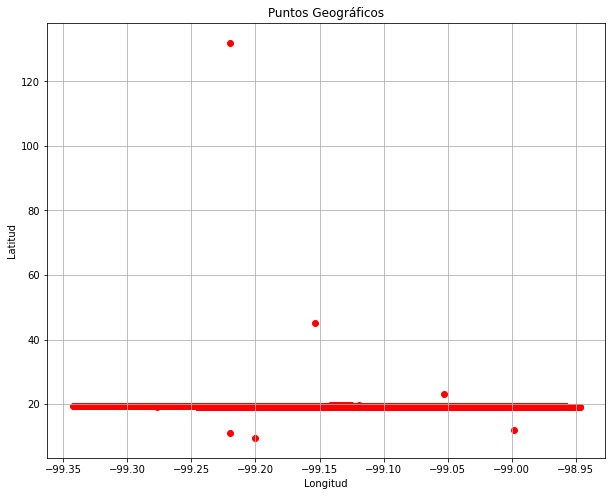

In [314]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un gráfico con marcadores estático
plt.figure(figsize=(10, 8))
plt.scatter(delitos['g_longitud'], delitos['g_latitud'], c='red', marker='o')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Puntos Geográficos')
plt.grid(True)
plt.show()



vemos que para la latidud hay datos que se ven atipicos, vamos a ver aquellos menores a 17 y mayores a 21, ya que la latitud en la cdmx esta alrededro de 19

In [315]:
delitos[(delitos["g_latitud"] > 21) | (delitos["g_latitud"] < 17)]

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,g_longitud,g_latitud,g_geopoint
506007,528305,2016,noviembre,2016-11-06 16:40:00,delito de bajo impacto,investigacion en zona centro poniente,mh 5,ui 1cd,periodista,zona centro poniente,2016-11-06 18:08:08,noviembre,2016,boulevard manuel avila camacho,-99.220010,132.000000,"19.4512294219,-99.2200102297"
506060,528361,2017,enero,2017-01-06 04:45:00,delito de bajo impacto,investigacion en zona oriente,izp 6,ui 1cd,lomas de zaragoza,zona oriente,2017-01-06 06:44:51,enero,2017,corregidora,-98.998598,12.000000,"19.3546391307,-98.9985978154"
506167,528471,2016,abril,2016-04-21 09:00:00,delito de bajo impacto,investigacion en zona centro poniente,cuh 7,ui 1sd,roma norte,zona centro poniente,2016-06-03 12:14:42,junio,2016,avenida cuauhtemoc,-99.153776,45.000000,"19.4251456591,-99.1537758695"
506323,528636,2016,octubre,2016-10-04 11:00:00,delito de bajo impacto,investigacion en zona sur,coy 1,ui 1cd,cuchilla del tesoro,zona norte,2016-11-03 19:45:08,noviembre,2016,ote 10,-99.053115,23.000000,"19.4503423847,-99.0531154017"
506413,528731,2016,junio,2016-06-30 11:58:00,robo de propiedades,investigacion en zona centro poniente,mh 3,ui 1sd,lomas de chapultepec i seccian,zona centro poniente,2016-06-30 19:02:34,junio,2016,alpes,-99.219956,11.000000,"19.4182359561,-99.2199564647"
716113,747569,2018,noviembre,2018-11-13 06:00:00,delito de bajo impacto,investigacion en zona centro poniente,az 1,ui 3sd,petrolera,zona centro poniente,2018-12-14 02:25:49,diciembre,2018,avenida miguel lerdo de tejada,-99.200700,9.486549,"9.48654899876,-99.2007"


de nuevo vamos a hacerlos coincider con el valor en geopint y vamos a eliminar el dato en latitud 9 ya que parece atipico

In [316]:
ind = (delitos["g_latitud"] > 21) | (delitos["g_latitud"] < 17)
delitos.loc[ind,"g_latitud"] =  delitos.loc[ind,'g_geopoint'].apply(lambda x: float(x.split(",")[0]))

In [317]:
delitos =  delitos[delitos['g_latitud'] > 10]

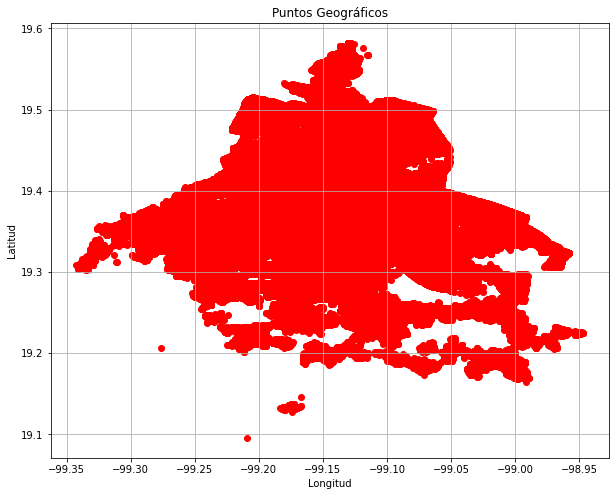

In [318]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(delitos['g_longitud'], delitos['g_latitud'], c='red', marker='o')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Puntos Geográficos')
plt.grid(True)
plt.show()



ya se ven consitentes los datos 

# Filtro

vamos a filtrar solo aquellos datos donde el año de hecho es mayor a 2013

In [319]:
delitos = delitos[delitos["c_ao_hechos"] > 2013]

In [320]:
delitos

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,g_longitud,g_latitud,g_geopoint
0,0,2016,enero,2016-01-05 17:00:00,delito de bajo impacto,investigacion en zona norte,gam 6,ui 1cd,granjas modernas,zona norte,2016-01-05 18:35:37,enero,2016,san juan de aragon,-99.103527,19.481076,"19.4810759998,-99.103527"
1,2,2017,noviembre,2017-11-01 16:40:00,robo a persona,investigacion en zona norte,izc 2,ui 1sd,gabriel ramos millan seccian tlacotal,zona norte,2017-11-01 16:56:04,noviembre,2017,sur 117,-99.106072,19.395398,"19.3953976727,-99.1060723829"
2,3,2015,diciembre,2015-12-30 20:00:00,delito de bajo impacto,investigacion en zona oriente,izp 8,ui 1cd,consejo agrarista mexicano,zona oriente,2016-01-05 21:12:42,enero,2016,cuarta cerrada de fresno,-99.055887,19.322458,"19.3224579998,-99.055887"
3,4,2018,mayo,2018-05-16 16:00:00,robo a repartidores o transportistas,investigacion en zona oriente,izp 9,ui 2sd,desarrollo urbano quetzalcoatl,zona oriente,2018-05-22 10:44:45,mayo,2018,tarasco,-99.042786,19.319141,"19.3191405147,-99.0427862526"
4,5,2018,mayo,2018-05-21 20:40:00,delito de bajo impacto,investigacion en zona centro poniente,cuh 2,ui 2sd,infonavit iztacalco,zona norte,2018-05-22 10:52:18,mayo,2018,francisco del paso y troncoso,-99.111563,19.386594,"19.3865939284,-99.1115626682"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774947,808866,2018,julio,2018-07-09 22:30:00,robo a persona,investigacion en zona centro poniente,mh 1,ui 1sd,anahuac,zona centro poniente,2018-07-10 18:24:33,julio,2018,lago alberto,-99.182018,19.439418,"19.439418014,-99.1820184667"
774948,808867,2018,julio,2018-07-29 05:00:00,delito de bajo impacto,investigacion en zona oriente,mil 2,ui 1cd,santa cruz xochitepec,zona oriente,2018-07-29 12:37:27,julio,2018,callejon morelos,-99.134738,19.254935,"19.2549354998,-99.1347381"
774949,808868,2019,febrero,2019-02-14 19:00:00,delito de alto impato,investigacion en zona centro poniente,h1,ui 1sd,industrial,zona norte,2019-02-15 12:50:00,febrero,2019,calz de los misterios,-99.122943,19.473867,"19.473866796,-99.1229431996"
774950,808869,2019,febrero,2019-02-15 10:00:00,delito de bajo impacto,investigacion en zona centro poniente,az 4,ui 1sd,cosmopolita,zona centro poniente,2019-02-15 13:04:00,febrero,2019,cerdeaa,-99.163384,19.473593,"19.4735930736,-99.163384042"


# nuevas variables

vamos a crear las siguientes variables a partir de la variable fecha_hechos
* Cuatrimestre
* día de la semana
* si es o no fin de semana 
* día del evento

In [321]:

delitos['c_cuatrimestre'] = delitos['d_fecha_hechos'].dt.quarter
delitos['v_dia_semana'] = delitos['d_fecha_hechos'].dt.day_name()
delitos['v_fin_semana'] = delitos['d_fecha_hechos'].dt.dayofweek // 5  # 1 para fin de semana, 0 para no
delitos['c_dia_mes'] = delitos['d_fecha_hechos'].dt.day
delitos

,c_id,c_ao_hechos,v_mes_hechos,d_fecha_hechos,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,...,v_mes_inicio,c_ao_inicio,t_calle_hechos,g_longitud,g_latitud,g_geopoint,c_cuatrimestre,v_dia_semana,v_fin_semana,c_dia_mes
0,0,2016,enero,2016-01-05 17:00:00,delito de bajo impacto,investigacion en zona norte,gam 6,ui 1cd,granjas modernas,zona norte,...,enero,2016,san juan de aragon,-99.103527,19.481076,"19.4810759998,-99.103527",1,Tuesday,0,5
1,2,2017,noviembre,2017-11-01 16:40:00,robo a persona,investigacion en zona norte,izc 2,ui 1sd,gabriel ramos millan seccian tlacotal,zona norte,...,noviembre,2017,sur 117,-99.106072,19.395398,"19.3953976727,-99.1060723829",4,Wednesday,0,1
2,3,2015,diciembre,2015-12-30 20:00:00,delito de bajo impacto,investigacion en zona oriente,izp 8,ui 1cd,consejo agrarista mexicano,zona oriente,...,enero,2016,cuarta cerrada de fresno,-99.055887,19.322458,"19.3224579998,-99.055887",4,Wednesday,0,30
3,4,2018,mayo,2018-05-16 16:00:00,robo a repartidores o transportistas,investigacion en zona oriente,izp 9,ui 2sd,desarrollo urbano quetzalcoatl,zona oriente,...,mayo,2018,tarasco,-99.042786,19.319141,"19.3191405147,-99.0427862526",2,Wednesday,0,16
4,5,2018,mayo,2018-05-21 20:40:00,delito de bajo impacto,investigacion en zona centro poniente,cuh 2,ui 2sd,infonavit iztacalco,zona norte,...,mayo,2018,francisco del paso y troncoso,-99.111563,19.386594,"19.3865939284,-99.1115626682",2,Monday,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774947,808866,2018,julio,2018-07-09 22:30:00,robo a persona,investigacion en zona centro poniente,mh 1,ui 1sd,anahuac,zona centro poniente,...,julio,2018,lago alberto,-99.182018,19.439418,"19.439418014,-99.1820184667",3,Monday,0,9
774948,808867,2018,julio,2018-07-29 05:00:00,delito de bajo impacto,investigacion en zona oriente,mil 2,ui 1cd,santa cruz xochitepec,zona oriente,...,julio,2018,callejon morelos,-99.134738,19.254935,"19.2549354998,-99.1347381",3,Sunday,1,29
774949,808868,2019,febrero,2019-02-14 19:00:00,delito de alto impato,investigacion en zona centro poniente,h1,ui 1sd,industrial,zona norte,...,febrero,2019,calz de los misterios,-99.122943,19.473867,"19.473866796,-99.1229431996",1,Thursday,0,14
774950,808869,2019,febrero,2019-02-15 10:00:00,delito de bajo impacto,investigacion en zona centro poniente,az 4,ui 1sd,cosmopolita,zona centro poniente,...,febrero,2019,cerdeaa,-99.163384,19.473593,"19.4735930736,-99.163384042",1,Friday,0,15


# revisión final

In [322]:
delitos.dtypes

c_id                               int64
c_ao_hechos                        int64
v_mes_hechos                      object
d_fecha_hechos            datetime64[ns]
v_categoria_delito                object
v_fiscalia                        object
t_agencia                         object
t_unidad_investigacion            object
v_colonia_hechos                  object
v_alcaldia_hechos                 object
d_fecha_inicio            datetime64[ns]
v_mes_inicio                      object
c_ao_inicio                        int64
t_calle_hechos                    object
g_longitud                       float64
g_latitud                        float64
g_geopoint                        object
c_cuatrimestre                     int64
v_dia_semana                      object
v_fin_semana                       int64
c_dia_mes                          int64
dtype: object

In [323]:
delitos.duplicated(subset = ["c_id"]).sum()

0

In [325]:
delitos.duplicated(subset = delitos.columns.difference(['c_id'])).sum()

0

In [326]:
delitos.isnull().sum(axis=0)

c_id                      0
c_ao_hechos               0
v_mes_hechos              0
d_fecha_hechos            0
v_categoria_delito        0
v_fiscalia                0
t_agencia                 0
t_unidad_investigacion    0
v_colonia_hechos          0
v_alcaldia_hechos         0
d_fecha_inicio            0
v_mes_inicio              0
c_ao_inicio               0
t_calle_hechos            0
g_longitud                0
g_latitud                 0
g_geopoint                0
c_cuatrimestre            0
v_dia_semana              0
v_fin_semana              0
c_dia_mes                 0
dtype: int64

In [327]:
n_rows_deps = delitos.shape[0]
n_rows_deps

768004

In [328]:
print("porcentaje de datos del total inicial ",n_rows_deps/n_rows) 

porcentaje de datos del total inicial  0.9910342834136824


finalmente colocamos c_id como el indice

In [329]:
delitos = delitos.set_index('c_id')

In [330]:
delitos

,c_ao_hechos,v_mes_hechos,d_fecha_hechos,v_categoria_delito,v_fiscalia,t_agencia,t_unidad_investigacion,v_colonia_hechos,v_alcaldia_hechos,d_fecha_inicio,v_mes_inicio,c_ao_inicio,t_calle_hechos,g_longitud,g_latitud,g_geopoint,c_cuatrimestre,v_dia_semana,v_fin_semana,c_dia_mes
c_id,,,,,,,,,,,,,,,,,,,,
0,2016,enero,2016-01-05 17:00:00,delito de bajo impacto,investigacion en zona norte,gam 6,ui 1cd,granjas modernas,zona norte,2016-01-05 18:35:37,enero,2016,san juan de aragon,-99.103527,19.481076,"19.4810759998,-99.103527",1,Tuesday,0,5
2,2017,noviembre,2017-11-01 16:40:00,robo a persona,investigacion en zona norte,izc 2,ui 1sd,gabriel ramos millan seccian tlacotal,zona norte,2017-11-01 16:56:04,noviembre,2017,sur 117,-99.106072,19.395398,"19.3953976727,-99.1060723829",4,Wednesday,0,1
3,2015,diciembre,2015-12-30 20:00:00,delito de bajo impacto,investigacion en zona oriente,izp 8,ui 1cd,consejo agrarista mexicano,zona oriente,2016-01-05 21:12:42,enero,2016,cuarta cerrada de fresno,-99.055887,19.322458,"19.3224579998,-99.055887",4,Wednesday,0,30
4,2018,mayo,2018-05-16 16:00:00,robo a repartidores o transportistas,investigacion en zona oriente,izp 9,ui 2sd,desarrollo urbano quetzalcoatl,zona oriente,2018-05-22 10:44:45,mayo,2018,tarasco,-99.042786,19.319141,"19.3191405147,-99.0427862526",2,Wednesday,0,16
5,2018,mayo,2018-05-21 20:40:00,delito de bajo impacto,investigacion en zona centro poniente,cuh 2,ui 2sd,infonavit iztacalco,zona norte,2018-05-22 10:52:18,mayo,2018,francisco del paso y troncoso,-99.111563,19.386594,"19.3865939284,-99.1115626682",2,Monday,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808866,2018,julio,2018-07-09 22:30:00,robo a persona,investigacion en zona centro poniente,mh 1,ui 1sd,anahuac,zona centro poniente,2018-07-10 18:24:33,julio,2018,lago alberto,-99.182018,19.439418,"19.439418014,-99.1820184667",3,Monday,0,9
808867,2018,julio,2018-07-29 05:00:00,delito de bajo impacto,investigacion en zona oriente,mil 2,ui 1cd,santa cruz xochitepec,zona oriente,2018-07-29 12:37:27,julio,2018,callejon morelos,-99.134738,19.254935,"19.2549354998,-99.1347381",3,Sunday,1,29
808868,2019,febrero,2019-02-14 19:00:00,delito de alto impato,investigacion en zona centro poniente,h1,ui 1sd,industrial,zona norte,2019-02-15 12:50:00,febrero,2019,calz de los misterios,-99.122943,19.473867,"19.473866796,-99.1229431996",1,Thursday,0,14
